In [12]:
#!pip install pandas_datareader
#!pip  show pandas_datareader

In [26]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2019,1,1)
end=datetime.datetime(2019,2,20)
df = web.DataReader("000660.KS","yahoo",start, end)
df = df.sort_index(ascending=False)
df
#df.loc["2019-02-01","Adj Close"]
#df["Adj Close"]
df.iloc[0,5]


75900

In [38]:
import pandas as pd

df1 = pd.read_csv("data/friend_list.csv")
df2 = pd.read_csv("data/friend_list.csv")
df3 = df1.append(df2, ignore_index=True, sort=False)
df3.duplicated() #중복되었는지?
df3.drop_duplicates() #중복제거 

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


In [72]:
df1 = pd.read_csv("data/friend_list.csv")
df2 = pd.DataFrame([{"name":"John", "age":30, "job":"선생님"},{"name":"Nate", "age":40, "job":"개발자"}])
df3 = df1.append(df2, ignore_index=True, sort=False)
df3.duplicated(["name"]) #이름이 중복되었는지?
df3.drop_duplicates(["name"], keep="last") #중복제거 keep="last" keep="first"

,name,age,job
1,Jenny,30,developer
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern
6,John,30,선생님
7,Nate,40,개발자


In [73]:
df1["point"] = [10,9,8,7,None,None]  #None-->칼럼이 숫자이면 NaN으로 변경되어 들어간다. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
name     6 non-null object
age      6 non-null int64
job      6 non-null object
point    4 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [74]:
df1.isna()
df1.isnull()
#결측값을 변경 
df1["point"] = df1["point"].fillna(0)
df1["job"] = df1["job"].fillna("-")
df1

,name,age,job,point
0,John,20,student,10.0
1,Jenny,30,developer,9.0
2,Nate,30,teacher,8.0
3,Julia,40,dentist,7.0
4,Brian,45,manager,0.0
5,Chris,25,intern,0.0


In [75]:
import numpy as np

df1["gender"] = ["male","female","female","female","male","male"]
a = df1[df1.gender =="male"].age
np.mean(a)
np.median(a)

25.0

In [76]:
df1.job.unique()

array(['student', 'developer', 'teacher', 'dentist', 'manager', 'intern'],
      dtype=object)

In [79]:
df1.gender =  df1.gender.map({"male":"남자" , "female":"여자"})
df1

,name,age,job,point,gender
0,John,20,student,10.0,남자
1,Jenny,30,developer,9.0,여자
2,Nate,30,teacher,8.0,여자
3,Julia,40,dentist,7.0,여자
4,Brian,45,manager,0.0,남자
5,Chris,25,intern,0.0,남자


In [78]:
df1

,name,age,job,point,gender
0,John,20,student,10.0,male
1,Jenny,30,developer,9.0,female
2,Nate,30,teacher,8.0,female
3,Julia,40,dentist,7.0,female
4,Brian,45,manager,0.0,male
5,Chris,25,intern,0.0,male


In [98]:
df = pd.read_csv("data/gapminder.tsv", "\t")
df.head(2)
df.tail(10)
df["country"].unique()
df.shape
df.shape[0]
df.shape[1]
df.columns
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [108]:
b = df[["country","continent","year"]] #dataframe의 subset 
a = df["country"]
type(a)
type(b)
b.head(2)

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957


In [119]:
#df["칼럼이름"]
df.loc[99] #index의 값이 99
df.iloc[99, :]#순서 

# a = df.shape[0]
# df.loc[ a - 2]

# df.tail(2)

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [121]:
#2,5,9 index를 가진 row
df.loc[[2,5,9]]

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [127]:
#2,5,9 순서의 row
df.iloc[[2,5,9], [0,1,2,5]]

,country,continent,year,gdpPercap
2,Afghanistan,Asia,1962,853.100710
5,Afghanistan,Asia,1977,786.113360
9,Afghanistan,Asia,1997,635.341351


In [129]:
#모든index, country,continent칼럼추출 
df.loc[:, ["country",'continent']]

In [134]:
list(range(3,6))

[3, 4, 5]

In [136]:
#위치:모든row, country,continent칼럼추출 
a = list(range(3,6))
df.iloc[:, a]

In [ ]:
#년도별 lifeExp평균 

In [146]:
# for data in df.groupby("year"):
#     print(type(data), data[0])

df.groupby("year")["lifeExp"].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [41]:
a = df.groupby(["year","continent"])["lifeExp","gdpPercap" ].max() 

type(a)
a

lifeExp      gdpPercap
year continent                        
1952 Africa      52.724    4725.295531
     Americas    68.750   13990.482080
     Asia        65.390  108382.352900
     Europe      72.670   14734.232750
     Oceania     69.390   10556.575660
1957 Africa      58.089    5487.104219
     Americas    69.960   14847.127120
     Asia        67.840  113523.132900
     Europe      73.470   17909.489730
     Oceania     70.330   12247.395320
1962 Africa      60.246    6757.030816
     Americas    71.300   16173.145860
     Asia        69.390   95458.111760
     Europe      73.680   20431.092700
     Oceania     71.240   13175.678000
1967 Africa      61.557   18772.751690
     Americas    72.130   19530.365570
     Asia        71.430   80894.883260
     Europe      74.160   22966.144320
     Oceania     71.520   14526.124650
1972 Africa      64.274   21011.497210
     Americas    72.880   21806.035940
     Asia        73.420  109347.867000
     Europe      74.720   27195.113040
     Oceania     71.930   16788.629480
1977 Africa      67.064   21951.211760
     Americas    74.210   24072.632130
     Asia        75.380   59265.477140
     Europe      76.110   26982.290520
     Oceania     73.490   18334.197510
1982 Africa      69.885   17364.275380
     Americas    75.760   25009.559140
     Asia        77.110   33693.175250
     Europe      76.990   28397.715120
     Oceania     74.740   19477.009280
1987 Africa      71.913   11864.408440
     Americas    76.860   29884.350410
     Asia        78.670   28118.429980
     Europe      77.410   31540.974800
     Oceania     76.320   21888.889030
1992 Africa      73.615   13522.157520
     Americas    77.950   32003.932240
     Asia        79.360   34932.919590
     Europe      78.770   33965.661150
     Oceania     77.560   23424.766830
1997 Africa      74.772   14722.841880
     Americas    78.610   35767.433030
     Asia        80.690   40300.619960
     Europe      79.390   41283.164330
     Oceania     78.830   26997.936570
2002 Africa      75.744   12521.713920
     Americas    79.770   39097.099550
     Asia        82.000   36023.105400
     Europe      80.620   44683.975250
     Oceania     80.370   30687.754730
2007 Africa      76.442   13206.484520
     Americas    80.653   42951.653090
     Asia        82.603   47306.989780
     Europe      81.757   49357.190170
     Oceania     81.235   34435.367440

In [155]:
#continent.....country
#for aa in df.groupby("continent")["country"].unique():
#    print(aa)
    
df.groupby("continent")["country"].unique()    
df.groupby("continent")["country"].nunique()     #갯수(빈도수)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [162]:
#!pip install matplotlib
import matplotlib


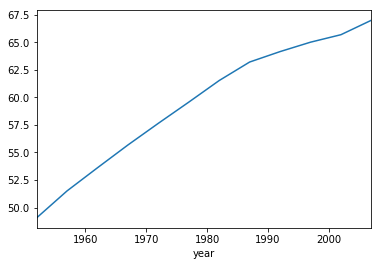

In [2]:
%matplotlib inline 
import pandas as pd
df = pd.read_csv("data/gapminder.tsv", "\t")
#year로 그룹  ... lifeExp...mean
a = df.groupby("year")["lifeExp"].mean()
type(a)
a.plot()

In [55]:
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [56]:
df = pd.read_csv("data/scientists.csv")
a = df.groupby("Occupation")
a = df.groupby("Occupation")["Age"]
a = df.groupby("Occupation")["Age"].max()
a
#for data in a:
#    print(data, type(data[0]), data[1], type(data[1]))


Occupation
Biologist             56
Chemist               66
Computer Scientist    41
Mathematician         77
Nurse                 90
Physician             45
Statistician          61
Name: Age, dtype: int64

In [60]:
ages = df["Age"]
ages.max()
ages.mean()

59.125

In [62]:
#평균나이보다 더 많은 나이들을 구해라~!

ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [63]:
df[ages > ages.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [67]:
ages * 10

0    370
1    610
2    900
3    660
4    560
5    450
6    410
7    770
Name: Age, dtype: int64

In [69]:
s = pd.Series([1,100])
s

0      1
1    100
dtype: int64

In [71]:
#index가 같은것끼리 더하기 
#일치하지 않으면 NaN
ages + s

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [76]:
ages.sort_values(ascending=False)
b = ages.sort_index(ascending=False)
ages + b

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [98]:
#df.info()


df["Born"] = pd.to_datetime(df["Born"], format='%Y-%m-%d')
df["Died"] = pd.to_datetime(df["Died"], format='%Y-%m-%d')

df["일수"] = df["Died"] - df["Born"]

#print(df["Born"].dtype, df["Died"].dtype) 
#df["Born"].dtype, df["Died"].dtype

In [99]:
#df.drop(["일수"], axis=1, inplace=True)
df

,Name,Born,Died,Age,Occupation,일수
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,28422 days


In [101]:
alist = [1,2,3,4]
with open("alist.txt", "w") as f:
    for d in alist:
        f.write(str(d))

In [102]:
with open("alist.txt", "r") as f:
    print(f.read())

1234


In [106]:
#pickle 
import pickle

alist = [[1,2,3,4],[5,6,7,8]]

with open("alist2.txt", "wb") as f:
    pickle.dump(alist, f)

In [107]:
with open("alist2.txt", "rb") as f:
    data = pickle.load(f)
    print(data, type(data))

[[1, 2, 3, 4], [5, 6, 7, 8]] <class 'list'>


In [109]:
df["Name"], type(df["Name"])

(0       Rosaline Franklin
 1          William Gosset
 2    Florence Nightingale
 3             Marie Curie
 4           Rachel Carson
 5               John Snow
 6             Alan Turing
 7            Johann Gauss
 Name: Name, dtype: object, pandas.core.series.Series)

In [111]:
s = df["Name"]
s.to_pickle("output/scientName.pickle")

In [112]:
s2 = pd.read_pickle("output/scientName.pickle")
s2, type(s2)

(0       Rosaline Franklin
 1          William Gosset
 2    Florence Nightingale
 3             Marie Curie
 4           Rachel Carson
 5               John Snow
 6             Alan Turing
 7            Johann Gauss
 Name: Name, dtype: object, pandas.core.series.Series)

In [113]:
df.to_pickle("output/scientist.pickle")

In [114]:
df2 = pd.read_pickle("output/scientist.pickle")
df2

,Name,Born,Died,Age,Occupation,일수
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,28422 days


In [117]:
!pip install xlwt #.xls로 저장하기 

In [118]:
!pip install openpyxl #.xlsx로 저장하기 

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5a\de\77\f07186146bd0337342dd8c86fa12441f4f9c59573c51dcce9d
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\2a\77\35\0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [122]:
!pip install xlrd  #excel read 

In [123]:
s = df["Name"]
df = s.to_frame()
import xlwt   #xls
import openpyxl  #xlsx

df.to_excel("output/aa.xls")
df.to_excel("output/bb.xlsx")

In [126]:
pd.read_excel("output/aa.xls")

,Unnamed: 0,Name
0,0,Rosaline Franklin
1,1,William Gosset
2,2,Florence Nightingale
3,3,Marie Curie
4,4,Rachel Carson
5,5,John Snow
6,6,Alan Turing
7,7,Johann Gauss


In [139]:

alist = pd.read_html("https://finance.naver.com/item/sise_day.nhn?code=000660")
alist[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.02.22,75900.0,800.0,75600.0,76100.0,75300.0,1124120.0
2,2019.02.21,76700.0,1000.0,75300.0,77200.0,74600.0,2874589.0
3,2019.02.20,75700.0,2000.0,73700.0,76000.0,73600.0,3134257.0
4,2019.02.19,73700.0,1000.0,74500.0,74800.0,73000.0,1462071.0
5,2019.02.18,74700.0,900.0,74300.0,75300.0,74000.0,1772434.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019.02.15,73800.0,3600.0,76800.0,76900.0,73800.0,4154616.0


In [157]:
df1 = pd.read_csv("data/concat_1.csv")
df2 = pd.read_csv("data/concat_2.csv")
df3 = pd.read_csv("data/concat_3.csv")

df_concat = pd.concat([df1,df2,df3], ignore_index=True)
#df_concat = df_concat.reset_index(drop=True)
#df_concat.loc[3]
#df_concat.iloc[3, :]
df_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [175]:
s = pd.Series(["n1","n2","n3","n4"])


In [160]:
s = pd.Series(["n1","n2","n3","n4"])
d = s.to_frame()
aa = pd.concat([df1, s])
print(aa)

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


In [162]:
#dataframe합치기.....concat, append(1개)
d = pd.DataFrame([["n1","n2","n3","n4"]], columns=["A","B","C","D"])
aa = pd.concat([df1, d], ignore_index=True)
print(aa)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  n1  n2  n3  n4


In [188]:
s = pd.Series(["n1","n2","n3","n4"])
dd = s.to_frame()
type(dd)
dd = dd.T
dd.columns = ["A","B","C","D"]
pd.concat([df1, dd], ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [196]:
pd.concat([df1, df2, df3], ignore_index=True, axis=1) #열방향으로 합치기 

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [201]:
df1.columns = ["A","B","C","D"]
df2.columns = ["E","F","G","H"]
df3.columns = ["A","C","F","G"]
df3

,A,C,F,G
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [203]:
pd.concat([df1, df2, df3], ignore_index=True, sort=True)

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7
8,a8,NaN,b8,NaN,NaN,c8,d8,NaN
9,a9,NaN,b9,NaN,NaN,c9,d9,NaN


In [206]:
pd.concat([df2, df3], ignore_index=True, sort=True, join="inner")

,F,G
0,b4,c4
1,b5,c5
2,b6,c6
3,b7,c7
4,c8,d8
5,c9,d9
6,c10,d10
7,c11,d11


In [207]:
#merge() : 기본적으로 내부조인
#left_on , right_on

#특정위치의 날씨에 필요한 데이터 집합 
#관측사람?
person = pd.read_csv("data/survey_person.csv")
#관측날짜?
survey = pd.read_csv("data/survey_survey.csv")
#날씨정보?
visited = pd.read_csv("data/survey_visited.csv")
#관측위치?
site = pd.read_csv("data/survey_site.csv")

In [217]:
print(site.head(2))
print("-"*80)
print(person.head(2))    #person.indent == survey.person 
print("-"*80)
print(visited.head(2))   #site.name == visited.site
print("-"*80)
print(survey.head(2))   #visited.ident == survey.taken 

   name    lat    long
0  DR-1 -49.85 -128.57
1  DR-3 -47.15 -126.72
--------------------------------------------------------------------------------
  ident personal   family
0  dyer  William     Dyer
1    pb    Frank  Pabodie
--------------------------------------------------------------------------------
   ident  site       dated
0    619  DR-1  1927-02-08
1    622  DR-1  1927-02-10
--------------------------------------------------------------------------------
   taken person quant  reading
0    619   dyer   rad     9.82
1    619   dyer   sal     0.13


In [227]:
#person.ident == survey.person 
df1 = person.merge(survey, left_on="ident", right_on="person")
#site.name == visited.site
df2 = site.merge(visited, left_on="name", right_on="site")
#visited.ident == survey.taken 
df3 = visited.merge(survey, left_on="ident", right_on="taken")

In [235]:
df4 = df1.merge(df2, left_on="taken", right_on="ident")
df5 = df4.merge(df3, left_on="person", right_on="person" )

In [236]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 19 columns):
ident_x      99 non-null object
personal     99 non-null object
family       99 non-null object
taken_x      99 non-null int64
person       99 non-null object
quant_x      99 non-null object
reading_x    99 non-null float64
name         99 non-null object
lat          99 non-null float64
long         99 non-null float64
ident_y      99 non-null int64
site_x       99 non-null object
dated_x      75 non-null object
ident        99 non-null int64
site_y       99 non-null object
dated_y      75 non-null object
taken_y      99 non-null int64
quant_y      99 non-null object
reading_y    99 non-null float64
dtypes: float64(4), int64(4), object(11)
memory usage: 15.5+ KB


In [242]:
#누락값 확인하기 
from numpy import NaN, nan, NAN

In [246]:
NaN == NAN  #false
pd.isna(NAN)
pd.isnull(NAN)

True

In [239]:
import numpy 
numpy.NaN
numpy.nan
numpy.NAN

nan

In [ ]:
#누락값이 생기는 이유 알아보기 

In [250]:
#누락값을 주는 경우
pd.Series({"AA":10, "BB":nan})


AA    10.0
BB     NaN
dtype: float64

In [249]:
#visited - 누락있음 
#survey - 누락없음 
visited.merge(survey, left_on="ident", right_on="taken")

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [264]:
df = pd.read_csv("data/gapminder.tsv", "\t")
lifeExp = df.groupby(["year"])["lifeExp"].mean()
#2000년 2009년 사이의 데이터를 추출해라~

#lifeExp.loc[range(2000,2010)]

lifeExp[(lifeExp.index>=2000) & (lifeExp.index < 2010)]


year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [271]:
ebola = pd.read_csv("data/country_timeseries.csv")

#누락값(결측값)이 아닌 데이터의 개수 
ebola.count()

ebola.shape

#누락값의 개수 
ebola.shape[0] - ebola.count()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [273]:
import numpy as np

np.count_nonzero

<function numpy.count_nonzero(a, axis=None)>

In [274]:
np.count_nonzero([True,True,False]) #True의 개수 

2

In [275]:
np.count_nonzero([[0,0,1,1,2,3,4,5]])

6

In [279]:
#null 의 갯수 
np.count_nonzero(ebola["Cases_Guinea"].isnull()) #null->True->1


29

In [285]:
#dropna=True ===>NaN을 제외하고 나오기 
#dropna=False ==>NaN의 갯수 포함 
#bola.Cases_Guinea.value_counts(dropna=False)
#bola

#

NaN        29
 86.0       3
 495.0      2
 112.0      2
 390.0      2
 506.0      1
 812.0      1
 771.0      1
 648.0      1
 607.0      1
 579.0      1
 543.0      1
 519.0      1
 510.0      1
 2597.0     1
 2769.0     1
 899.0      1
 2571.0     1
 485.0      1
 472.0      1
 460.0      1
 427.0      1
 415.0      1
 861.0      1
 942.0      1
 936.0      1
 1667.0     1
 2706.0     1
 2416.0     1
 2292.0     1
           ..
 1519.0     1
 151.0      1
 1199.0     1
 143.0      1
 127.0      1
 122.0      1
 103.0      1
 49.0       1
 2695.0     1
 2730.0     1
 208.0      1
 218.0      1
 408.0      1
 412.0      1
 413.0      1
 398.0      1
 351.0      1
 344.0      1
 328.0      1
 291.0      1
 281.0      1
 258.0      1
 248.0      1
 233.0      1
 236.0      1
 235.0      1
 231.0      1
 226.0      1
 224.0      1
 2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [303]:
#결측값을 변경 .... 0으로 넣기 
#ebla.fillna(0)

#ebola.fillna(method="ffill")
#ebola.fillna(method="bfill")
#결측이 나타나면 양쪽의 중간값 
ebola.interpolate()
#ebola
#누락값 지우기
#ebola.dropna()
ebola2 = ebola.fillna(0)
ebola2["세지역합계"] = ebola2["Cases_Guinea"] + ebola2["Cases_Liberia"] + ebola2["Cases_SierraLeone"]


In [328]:
#특정 칼럼의 값이 null(NaN)이면 제거 

#ebola[ebola["Cases_Guinea"].isnull() == False]
#ebola[~ebola["Cases_Guinea"].isnull()]

ebola.dropna(subset = ["Cases_Guinea", "Cases_Liberia","Cases_SierraLeone"])

#null  제외한 합계 
ebola.Cases_Guinea.sum()
ebola.Cases_Guinea.sum(skipna=True)
#bola.Cases_Guinea.sum(skipna=False)  =>nan
ebola.Cases_Guinea.max()
ebola.Cases_Guinea.mean()

911.0645161290323

In [330]:
ebola.Cases_Guinea.sum(skipna=False)

nan

In [304]:
ebola2.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,세지역합계
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0,12806.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0,12555.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0,20657.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0,8157.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0,20478.0
